#   Predicting whether there is any chance for landslide based on the given conditions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#giving column names to the data
# importing the data into a pandas dataframe (df)
columns = ["Landslide",	'Aspect',	'Curvature',	'Earthquake',	'Elevation',	'Flow',	'Lithology',	'NDVI',	'NDWI',	'Plan',	'Precipitation',	'Profile',	'Slope']
df=pd.DataFrame(columns=columns)
df = pd.read_csv("/content/drive/MyDrive/Complete-data - Complete-data.csv",names=columns)

In [ ]:
#printing the forst 5 columns to see the data
df.head()
#in the landslide column 0-no landslide   1-landslide taken place

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [ ]:
# checking the type of data types in different columns
df.dtypes

Landslide        int64
Aspect           int64
Curvature        int64
Earthquake       int64
Elevation        int64
Flow             int64
Lithology        int64
NDVI             int64
NDWI             int64
Plan             int64
Precipitation    int64
Profile          int64
Slope            int64
dtype: object

In [ ]:
# checking the size of the data 
# data contains 13 columns (that is 13 parameters) and 1212 training examples
m,n=df.shape
print(m,n)

1212 13


In [ ]:
# checking distribution of data 
df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#checking if there are any inconsistence in data(that is if there are any null or empty values)
print(df.isna().sum())
df.shape

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64


(1212, 13)

In [ ]:
#the below heatmap show the relation between different parameters
#positive values represent direct relation and negative values represent reciprocal relation
#values near to one are highly correlated
df_corr = df.corr()
plt.figure(figsize=(20, 20),dpi=600)
g=sns.heatmap(df_corr, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')

[Text(0.5, 0, 'Landslide'),
 Text(1.5, 0, 'Aspect'),
 Text(2.5, 0, 'Curvature'),
 Text(3.5, 0, 'Earthquake'),
 Text(4.5, 0, 'Elevation'),
 Text(5.5, 0, 'Flow'),
 Text(6.5, 0, 'Lithology'),
 Text(7.5, 0, 'NDVI'),
 Text(8.5, 0, 'NDWI'),
 Text(9.5, 0, 'Plan'),
 Text(10.5, 0, 'Precipitation'),
 Text(11.5, 0, 'Profile'),
 Text(12.5, 0, 'Slope')]

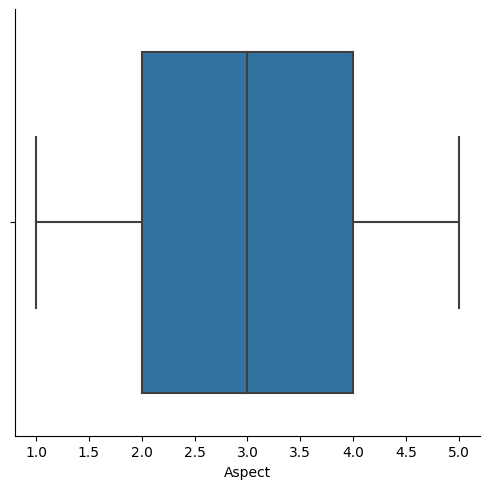

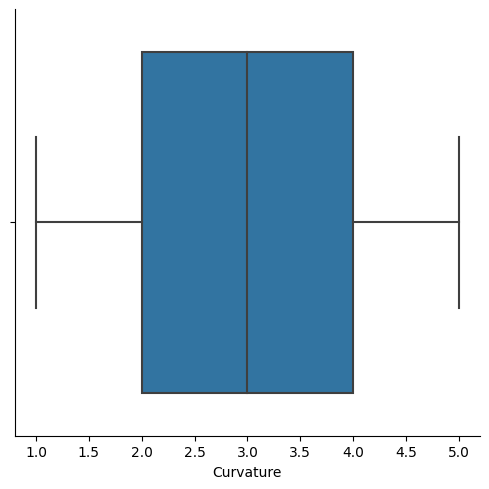

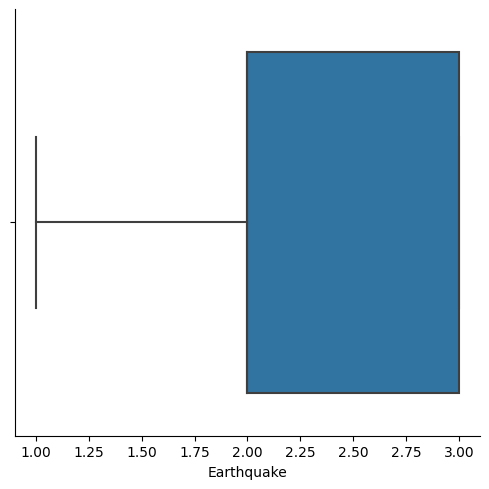

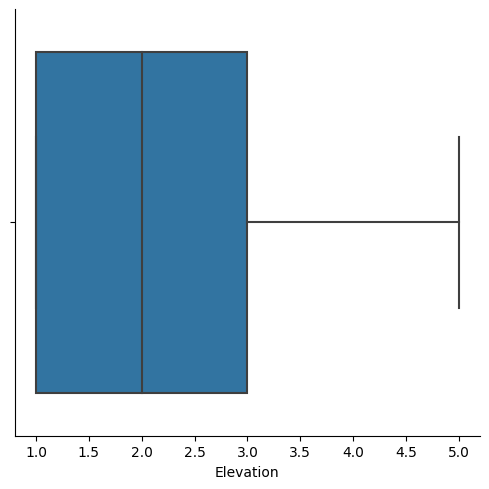

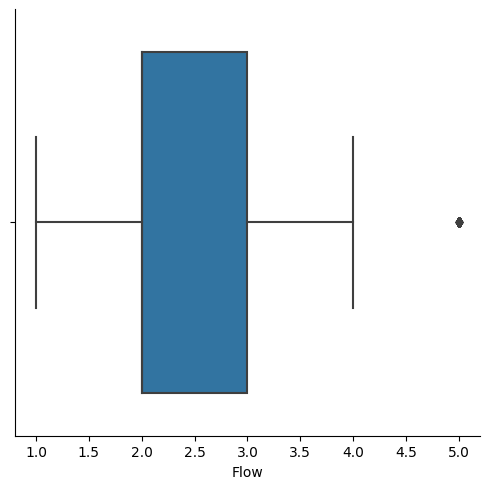

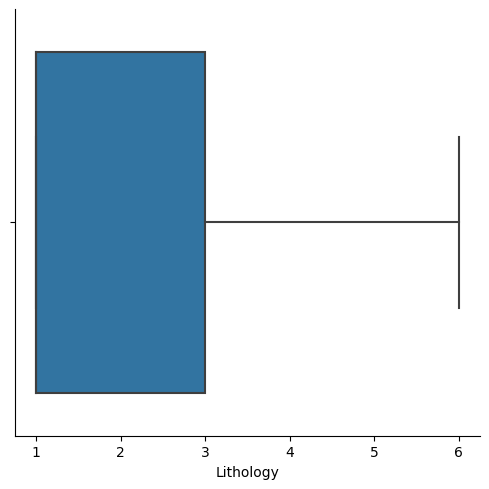

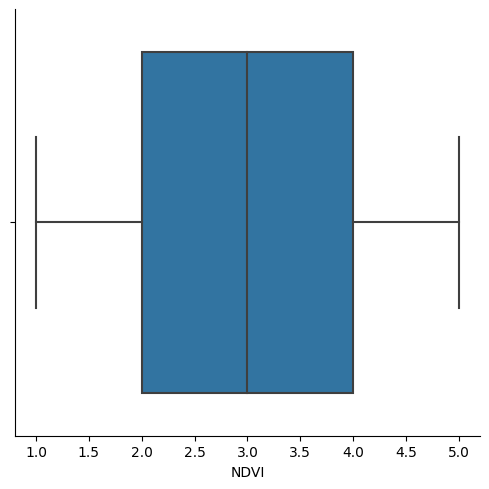

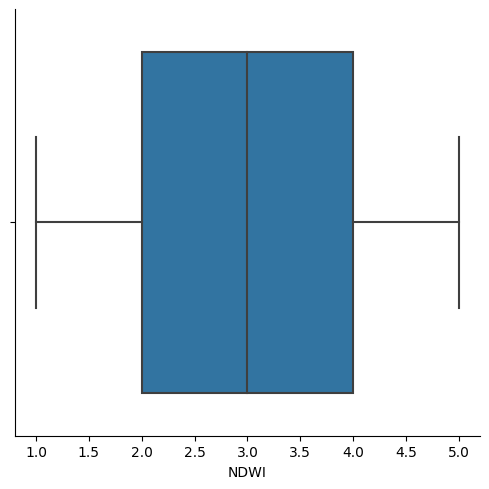

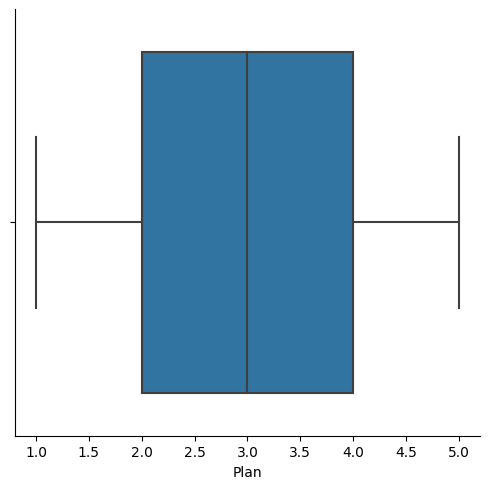

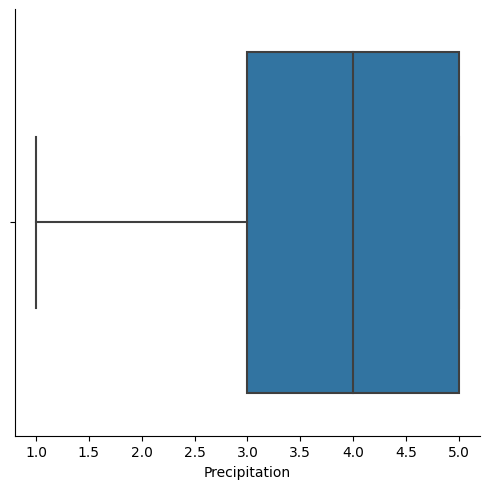

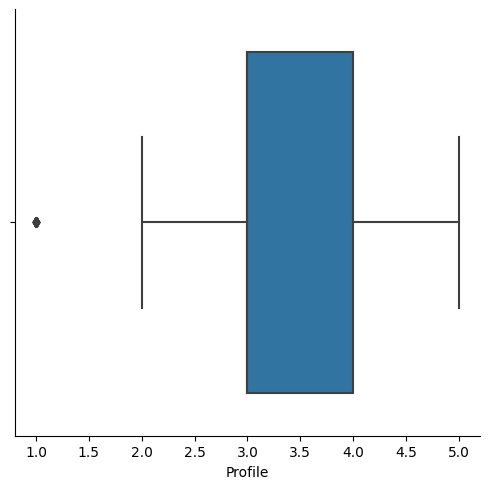

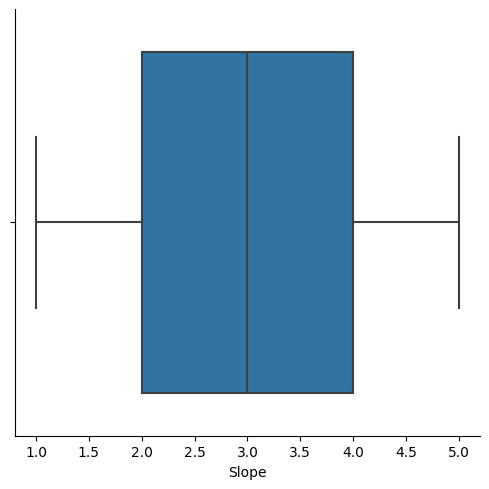

In [ ]:
col = [ "Aspect", "Curvature", "Earthquake" ,"Elevation","Flow","Lithology", "NDVI", "NDWI", "Plan","Precipitation","Profile" ,"Slope"]
#box plot show outlines in the data
#we can see some points in flow are profile are different from the other

for k in col:
  sns.catplot(x=k, kind = 'box',data = df)

<Axes: >

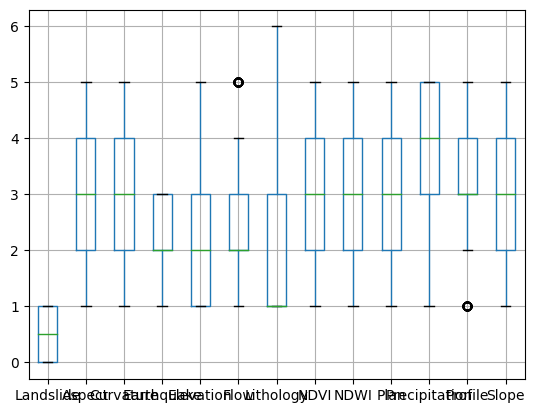

In [ ]:
df.boxplot()

In [ ]:
#we are using IQR method to remove the outliner points
#we can see that there are outlines in flow and profile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

# Print the columns with outliers
print(outliers)

Landslide        False
Aspect           False
Curvature        False
Earthquake       False
Elevation        False
Flow              True
Lithology        False
NDVI             False
NDWI             False
Plan             False
Precipitation    False
Profile           True
Slope            False
dtype: bool


In [ ]:
# Define the outlier threshold
outlier_threshold = 1.5

# Remove outliers based on the IQR method
df = df[~((df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))).any(axis=1)]



In [ ]:

#we are now making the target variable into a new dataframe(y).
y = pd.DataFrame(columns=columns)
y=df[['Landslide']].copy()
y.head(12)



,Landslide
0,0
1,0
2,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0


In [ ]:
#removing it from the original dataframe(because we already shifted that row into y)
df = df.drop("Landslide",axis=1)

In [ ]:
#checking the dimensions of the dataframes df(training parameters) and y(target variable) after removing outliners
#initially there are 1212 training data after removing the outliners there are 1075 data
a,b=y.shape
m,n=df.shape
print(m,n)
print(a,b)

1075 12
1075 1


In [ ]:
df.head()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,3,3,2,2,2,1,4,2,2,3,3,2
1,1,5,2,3,1,1,4,2,5,5,2,2
2,3,4,3,2,2,4,3,2,4,5,2,2
5,5,5,2,2,3,1,2,4,5,3,2,2
6,1,3,2,2,4,1,3,4,3,5,3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=9)
X_selected = selector.fit_transform(X_scaled, y)

# # Perform label encoding on categorical variables
# categorical_cols = ['category1', 'category2']
# X_encoded = df.copy()
# for col in categorical_cols:
#     label_encoder = LabelEncoder()
#     X_encoded[col] = label_encoder.fit_transform(df[col])

# Create interaction features
X_interactions = df.copy()
X_interactions['interaction1'] = df['Precipitation'] * df['Earthquake']
X_interactions['interaction2'] = 1/(df['Flow'] + df['NDWI'])

# Print the engineered features
print("Scaled features:")
print(X_scaled)
print("Selected features:")
print(X_selected)
print("Features with interactions:")
print(X_interactions)




Scaled features:
[[-0.05431931  0.10905619 -0.16191046 ... -0.61962633 -0.40944066
  -0.67186431]
 [-1.90807344  2.03094798 -0.16191046 ...  0.8772238  -1.49355077
  -0.67186431]
 [-0.05431931  1.07000208  1.33855282 ...  0.8772238  -1.49355077
  -0.67186431]
 ...
 [-0.05431931  1.07000208 -1.66237373 ... -1.3680514  -1.49355077
   1.8505599 ]
 [-0.98119638 -0.85188971 -1.66237373 ... -2.11647647 -0.40944066
   0.16894376]
 [-0.05431931  1.07000208 -1.66237373 ... -2.11647647 -1.49355077
   0.16894376]]
Selected features:
[[ 0.10905619 -0.16191046 -0.31379038 ... -0.96715799 -0.61962633
  -0.40944066]
 [ 2.03094798 -0.16191046  0.50695088 ...  1.90492721  0.8772238
  -1.49355077]
 [ 1.07000208  1.33855282 -0.31379038 ...  0.94756547  0.8772238
  -1.49355077]
 ...
 [ 1.07000208 -1.66237373  2.14843341 ... -0.00979626 -1.3680514
  -1.49355077]
 [-0.85188971 -1.66237373  0.50695088 ... -1.92451972 -2.11647647
  -0.40944066]
 [ 1.07000208 -1.66237373  0.50695088 ...  0.94756547 -2.11647647

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#dividing the data into training and validation set (70% of 1075 is used for training the model and 30% for validation)
x_train, x_validation, y_train, y_validation = train_test_split(X_interactions, y, test_size = 0.3,random_state=42)


In [ ]:
m,n=X_interactions.shape
print(m,n)

1075 14


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_validation)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7523219814241486


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_validation, y_pred)

# Create a pandas DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print(confusion_df)


          Predicted 0  Predicted 1
Actual 0          105           54
Actual 1           26          138


In [ ]:
#The model is 75% accurate